In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import seaborn as sns # graficos con enfasis en estadistica
import gdown # permite descargar archivos directamente desde Google Drive



In [15]:
df_AU = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/XAU_USD_2016-2025_01-12_1h_bars.csv')


In [16]:
df_AU

,UTC,Open,High,Low,Close,Volume
0,03.01.2016 23:00:00 UTC,1062.341,1066.321,1061.729,1063.059,1.61136
1,04.01.2016 00:00:00 UTC,1063.059,1064.740,1062.729,1064.459,2.77903
2,04.01.2016 07:00:00 UTC,1069.809,1073.052,1068.518,1071.321,3.45542
3,04.01.2016 05:00:00 UTC,1065.358,1068.949,1065.049,1068.659,3.96556
4,04.01.2016 06:00:00 UTC,1068.660,1070.119,1067.909,1069.801,2.40655
...,...,...,...,...,...,...
54111,21.11.2025 20:00:00 UTC,4087.365,4088.495,4054.955,4067.098,3.64090
54112,23.11.2025 23:00:00 UTC,4070.098,4077.285,4064.745,4074.905,1.19017
54113,24.11.2025 02:00:00 UTC,4043.805,4051.385,4040.375,4043.345,1.35411
54114,24.11.2025 00:00:00 UTC,4074.895,4075.855,4057.935,4067.198,1.01279


In [23]:
df_AU.shape

(54116, 6)

In [24]:
df_AU.columns

Index(['UTC', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [25]:
df_AU.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54116 entries, 0 to 54115
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UTC     54116 non-null  object 
 1   Open    54116 non-null  float64
 2   High    54116 non-null  float64
 3   Low     54116 non-null  float64
 4   Close   54116 non-null  float64
 5   Volume  54116 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.5+ MB


In [26]:
print(df_AU.isnull().sum())

UTC       0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [27]:
df_AU['Volume'].unique()

array([1.61136, 2.77903, 3.45542, ..., 3.35636, 3.6409 , 1.01279])

In [28]:
df_AU['Volume'].nunique()

51518

In [29]:
nombres_columnas = list(df_AU.columns)
for i in nombres_columnas:
    print(f'La columna {i} tiene: {df_AU[i].nunique()} valores unicos')

La columna UTC tiene: 54116 valores unicos
La columna Open tiene: 49073 valores unicos
La columna High tiene: 49388 valores unicos
La columna Low tiene: 49213 valores unicos
La columna Close tiene: 49378 valores unicos
La columna Volume tiene: 51518 valores unicos


In [30]:
print(df_AU['UTC'].head())

0    03.01.2016 23:00:00 UTC
1    04.01.2016 00:00:00 UTC
2    04.01.2016 07:00:00 UTC
3    04.01.2016 05:00:00 UTC
4    04.01.2016 06:00:00 UTC
Name: UTC, dtype: object


In [31]:
df_AU['UTC'].unique()

array(['03.01.2016 23:00:00 UTC', '04.01.2016 00:00:00 UTC',
       '04.01.2016 07:00:00 UTC', ..., '24.11.2025 02:00:00 UTC',
       '24.11.2025 00:00:00 UTC', '24.11.2025 01:00:00 UTC'], dtype=object)

# Limpieza de la columna de fecha y hora 'UTC'


In [32]:
# Reemplazar el texto " UTC" en la variable fecha??
"""df_AU.replace([' UTC'],
                     '',inplace=True)"""


# Eliminación del texto " UTC" en los valores de la columna
df_AU['UTC'] = df_AU['UTC'].str.replace(' UTC', '', regex=False)

# Conversión de la cadena de texto en que está la fecha 'UTC' (tipo object,
# al formato Datetime 'DD.MM.YYYY HH:MM:SS'
df_AU['UTC'] = pd.to_datetime(df_AU['UTC'], format='%d.%m.%Y %H:%M:%S')

# Establecemos la columna "Date" como Índice, para poder luego trabajar con series de tiempo
df_AU = df_AU.set_index('UTC')


print("--- Información del DataFrame después de la limpieza y conversión ---") # Verificacion
df_AU.info()
print("\n--- Primeros registros con el nuevo índice de fecha/hora ---")
print(df_AU.head())

--- Información del DataFrame después de la limpieza y conversión ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54116 entries, 2016-01-03 23:00:00 to 2025-11-24 01:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    54116 non-null  float64
 1   High    54116 non-null  float64
 2   Low     54116 non-null  float64
 3   Close   54116 non-null  float64
 4   Volume  54116 non-null  float64
dtypes: float64(5)
memory usage: 2.5 MB

--- Primeros registros con el nuevo índice de fecha/hora ---
                         Open      High       Low     Close   Volume
UTC                                                                 
2016-01-03 23:00:00  1062.341  1066.321  1061.729  1063.059  1.61136
2016-01-04 00:00:00  1063.059  1064.740  1062.729  1064.459  2.77903
2016-01-04 07:00:00  1069.809  1073.052  1068.518  1071.321  3.45542
2016-01-04 05:00:00  1065.358  1068.949  1065.049  1068.659  3.96556
2016-01-04 0

In [40]:
df_AU.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [33]:
df_AU.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,54116.0,1815.261266,631.536532,1062.3410,1302.310250,1749.001000,1956.25225,4377.8850
High,54116.0,1817.643209,632.811595,1064.6090,1303.315750,1751.153000,1958.72750,4381.2980
Low,54116.0,1812.835181,630.233849,1061.7290,1301.128000,1746.370500,1953.78475,4358.9480
Close,54116.0,1815.305744,631.615135,1063.0590,1302.320250,1748.971000,1956.28925,4377.8480
Volume,54116.0,2.427777,1.850144,0.0002,1.074997,1.952063,3.25965,28.2989


In [34]:
# df_AU.groupby(['UTC','Low']).size().sort_values(ascending=False).head(40) < 1812

# Filtro los datos por debajo de la media y los muestro por fecha y hora
df_filtrado_por_low = df_AU[df_AU['Low'] < 1812]

print(df_filtrado_por_low[['Low']])

                          Low
UTC                          
2016-01-03 23:00:00  1061.729
2016-01-04 00:00:00  1062.729
2016-01-04 07:00:00  1068.518
2016-01-04 05:00:00  1065.049
2016-01-04 06:00:00  1067.909
...                       ...
2023-03-08 02:00:00  1810.535
2023-03-08 04:00:00  1809.688
2023-03-08 01:00:00  1811.255
2023-03-09 02:00:00  1811.805
2023-10-06 12:00:00  1810.288

[31498 rows x 1 columns]


In [38]:
df_AU.median()

,0
Open,1749.001000
High,1751.153000
Low,1746.370500
Close,1748.971000
Volume,1.952063


In [35]:
# df_AU.groupby(['UTC','High']).size().sort_values(ascending=False).head(40) > 1817

# Filtro los datos por encima de la media y los muestro por fecha y hora
df_filtrado_por_High = df_AU[df_AU['High'] > 1817]

print(df_filtrado_por_High[['High']])

                         High
UTC                          
2020-07-08 14:00:00  1817.848
2020-07-20 13:00:00  1817.498
2020-07-20 15:00:00  1817.645
2020-07-20 14:00:00  1820.438
2020-07-20 19:00:00  1818.758
...                       ...
2025-11-21 20:00:00  4088.495
2025-11-23 23:00:00  4077.285
2025-11-24 02:00:00  4051.385
2025-11-24 00:00:00  4075.855
2025-11-24 01:00:00  4073.038

[22506 rows x 1 columns]


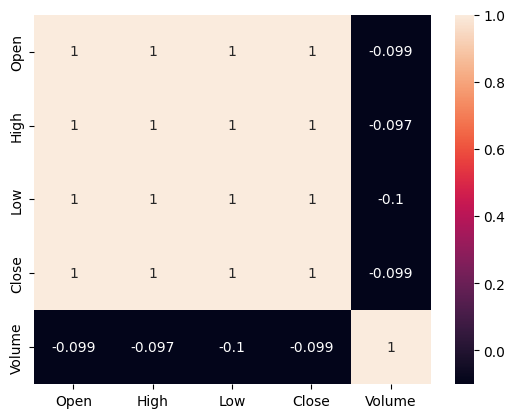

In [ ]:
correlacion = df_AU.corr(numeric_only = True) # Calculo correlacion
sns.heatmap(correlacion, annot = True) # Grafico correlacion
plt.show()

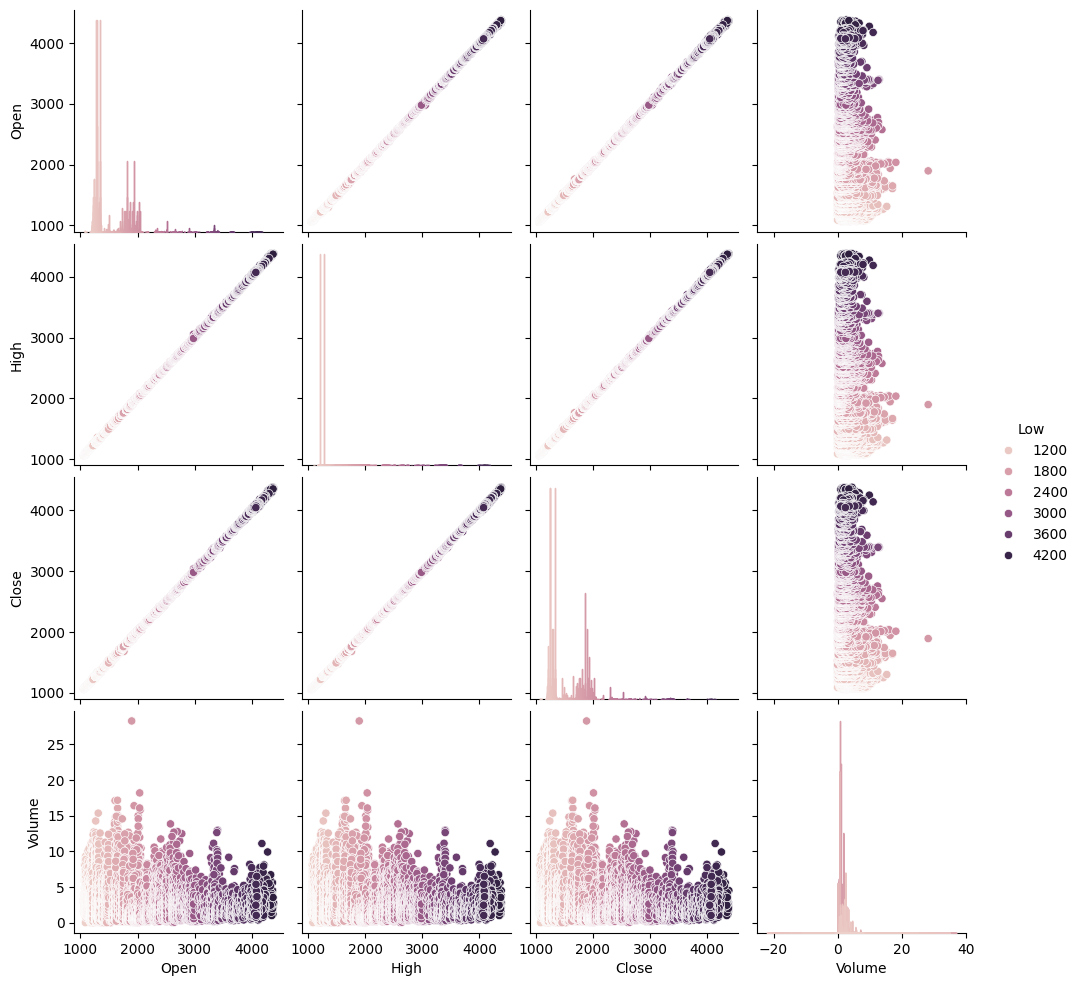

In [ ]:
sns.pairplot(data=df_AU, hue='Low')
plt.show()

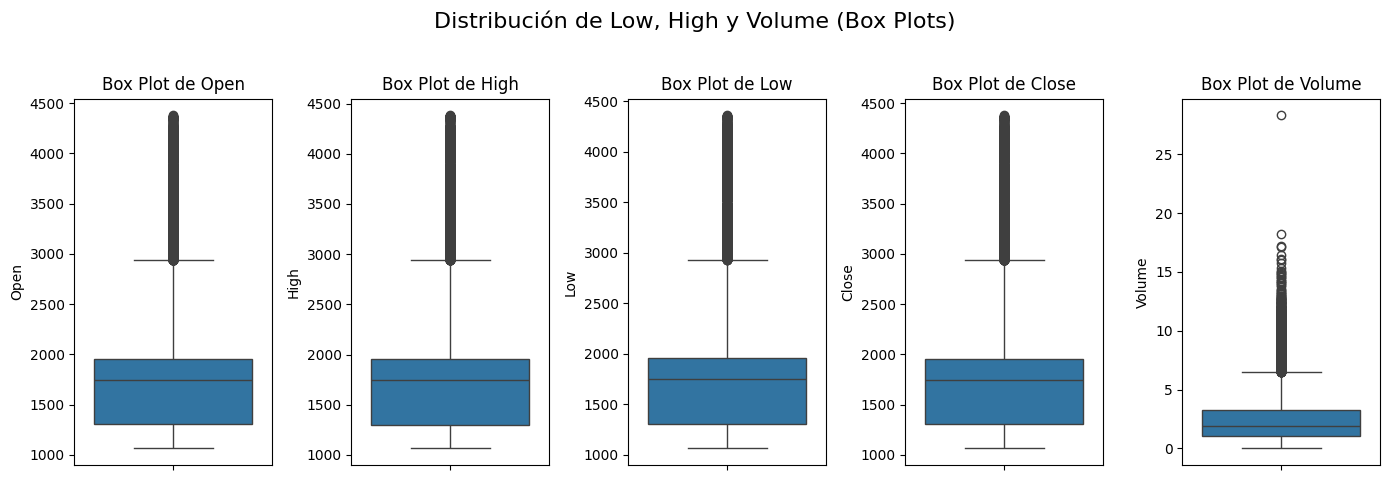

In [51]:
columns_plot = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(14, 5))
plt.suptitle('Distribución de Low, High y Volume (Box Plots)', fontsize=16)

for i, col in enumerate(columns_plot):
    plt.subplot(1, 5, i + 1)
    # Aquí {col} representa las columnas 'Low', 'High' y 'Volume'
    sns.boxplot(y=df_AU[col])
    plt.title(f'Box Plot de {col}')
    plt.ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

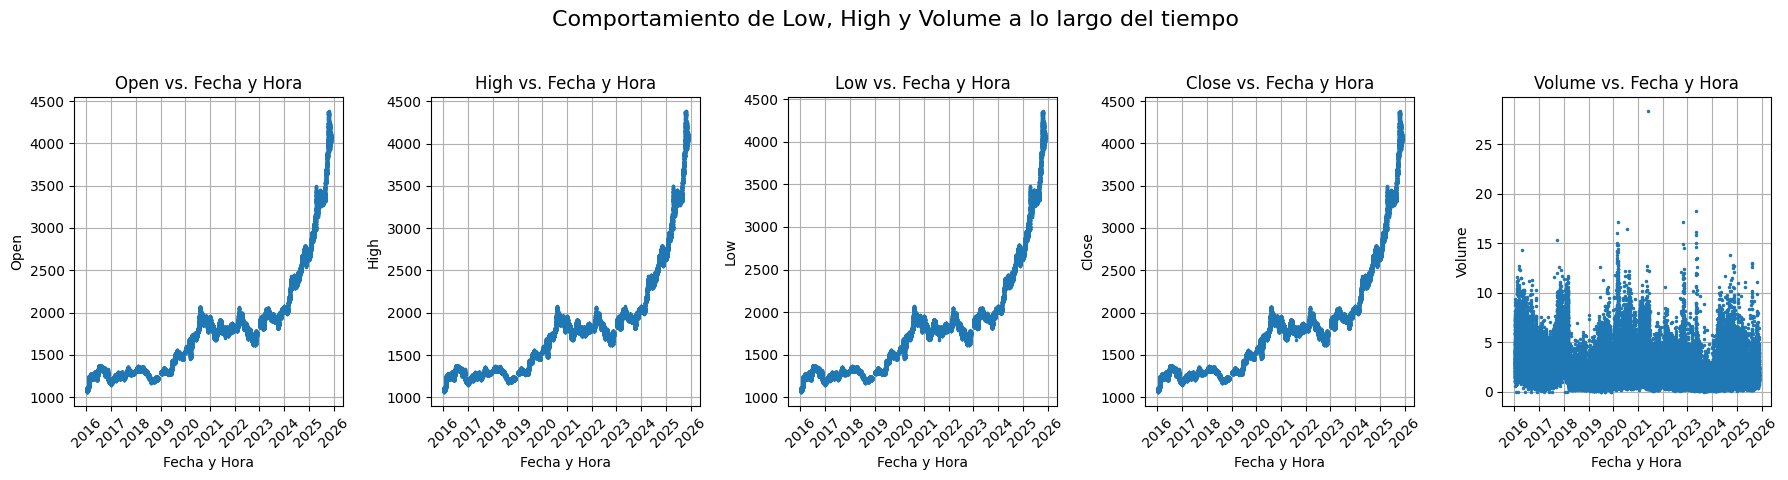

In [52]:
plt.figure(figsize=(18, 5))
plt.suptitle('Comportamiento de Low, High y Volume a lo largo del tiempo', fontsize=16)

for i, col in enumerate(columns_plot):
    plt.subplot(1, 5, i + 1)

    plt.plot(df_AU.index, df_AU[col], label=col, marker='.', linestyle='', markersize=3)
    plt.title(f'{col} vs. Fecha y Hora')
    plt.xlabel('Fecha y Hora')
    plt.ylabel(col)
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Identificacion de Outliers

--- Outliers en la columna 'Open' ---
Límite Inferior: 321.40, Límite Superior: 2937.17
Número de outliers: 4210
                         Open
UTC                          
2025-02-19 11:00:00  2944.635
2025-02-19 09:00:00  2938.415
2025-02-19 10:00:00  2945.305
2025-02-19 02:00:00  2938.265
2025-02-19 15:00:00  2937.855
--------------------------------------------------
--- Outliers en la columna 'High' ---
Límite Inferior: 320.20, Límite Superior: 2941.85
Número de outliers: 4199
                         High
UTC                          
2025-02-11 02:00:00  2942.665
2025-02-19 11:00:00  2945.955
2025-02-19 09:00:00  2946.395
2025-02-19 10:00:00  2946.865
2025-02-20 05:00:00  2946.685
--------------------------------------------------
--- Outliers en la columna 'Low' ---
Límite Inferior: 322.14, Límite Superior: 2932.77
Número de outliers: 4220
                          Low
UTC                          
2025-02-14 09:00:00  2933.895
2025-02-14 10:00:00  2934.035
2025-02-18 21:00:00 

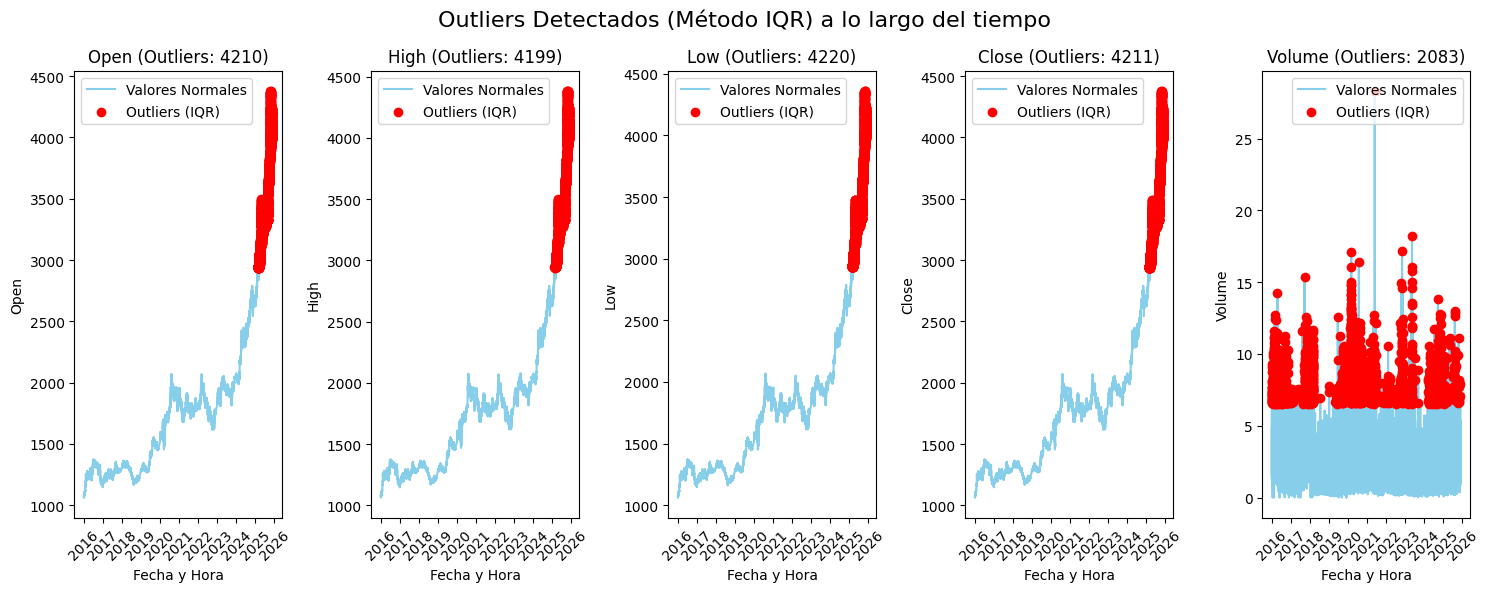

In [59]:
columns_to_check = ['Open', 'High', 'Low', 'Close', 'Volume']
all_outlier_indices = pd.Index([]) # Para almacenar los índices de los outliers de ambas columnas

plt.figure(figsize=(15, 6))
plt.suptitle('Outliers Detectados (Método IQR) a lo largo del tiempo', fontsize=16)

for i, col in enumerate(columns_to_check):
    # Calcular Q1, Q3, e IQR
    Q1 = df_AU[col].quantile(0.25)
    Q3 = df_AU[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites del Outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers_mask = (df_AU[col] < lower_bound) | (df_AU[col] > upper_bound)
    outliers = df_AU[outliers_mask]

    # Almacenar los índices para el filtrado posterior
    all_outlier_indices = all_outlier_indices.union(outliers.index)

    print(f"--- Outliers en la columna '{col}' ---")
    print(f"Límite Inferior: {lower_bound:.2f}, Límite Superior: {upper_bound:.2f}")
    print(f"Número de outliers: {len(outliers)}")
    if not outliers.empty:
        print(outliers[[col]].head()) # Muestra los primeros 5 outliers
    print("-" * 50)
    # Graficar los datos con los outliers resaltados
    plt.subplot(1, 5, i + 1)
    plt.plot(df_AU.index, df_AU[col], label='Valores Normales', color='skyblue')
    if not outliers.empty:
        plt.scatter(outliers.index, outliers[col], color='red', label='Outliers (IQR)', zorder=5)
    plt.title(f'{col} (Outliers: {len(outliers)})')
    plt.xlabel('Fecha y Hora')
    plt.ylabel(col)
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [60]:
columns_to_check = ['Open', 'High', 'Low', 'Close', 'Volume']
outlier_mask = pd.Series(False, index=df_AU.index) # Máscara para rastrear outliers

print("--- Outliers Identificados y Fechas Clave ---")

# 1. Recolectar la máscara de Outliers de Low y High
for col in columns_to_check:
    Q1 = df_AU[col].quantile(0.25)
    Q3 = df_AU[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Crea la máscara booleana para esta columna
    col_outlier_mask = (df_AU[col] < lower_bound) | (df_AU[col] > upper_bound)

    # Combina las máscaras (si hay un outlier en 'Low' O en 'High', la fila se marca)
    outlier_mask = outlier_mask | col_outlier_mask

    # Muestra los límites
    print(f"Columna {col}: Límite Inf: {lower_bound:.2f}, Límite Sup: {upper_bound:.2f}")

# 2. Crear el DataFrame de Outliers
# Selecciona solo las filas donde la máscara de outliers es True
df_outliers = df_AU[outlier_mask]

# 3. Crear el DataFrame "Limpio" (para el entrenamiento del LSTM)
# Selecciona solo las filas donde la máscara de outliers es False (~)
df_AU_limpio_para_LSTM = df_AU[~outlier_mask]

# Mostrar el resultado del aislamiento
print("\n--- Fechas de Outliers Aislados (df_outliers) ---")
print(f"Total de filas con outliers: {len(df_outliers)}")
# Mostrar el índice de fecha/hora de los outliers
print(df_outliers.index)

print("\n--- DataFrame Limpio (df_AU_limpio_para_LSTM) ---")
print(f"Total de filas para entrenamiento: {len(df_AU_limpio_para_LSTM)}")
print(df_AU_limpio_para_LSTM.head())

--- Outliers Identificados y Fechas Clave ---
Columna Open: Límite Inf: 321.40, Límite Sup: 2937.17
Columna High: Límite Inf: 320.20, Límite Sup: 2941.85
Columna Low: Límite Inf: 322.14, Límite Sup: 2932.77
Columna Close: Límite Inf: 321.37, Límite Sup: 2937.24
Columna Volume: Límite Inf: -2.20, Límite Sup: 6.54

--- Fechas de Outliers Aislados (df_outliers) ---
Total de filas con outliers: 6272
DatetimeIndex(['2016-01-05 14:00:00', '2016-01-06 13:00:00',
               '2016-01-06 14:00:00', '2016-01-07 15:00:00',
               '2016-01-08 15:00:00', '2016-01-08 13:00:00',
               '2016-01-08 14:00:00', '2016-01-11 13:00:00',
               '2016-01-11 15:00:00', '2016-01-11 16:00:00',
               ...
               '2025-11-21 17:00:00', '2025-11-21 16:00:00',
               '2025-11-21 14:00:00', '2025-11-21 15:00:00',
               '2025-11-21 18:00:00', '2025-11-21 20:00:00',
               '2025-11-23 23:00:00', '2025-11-24 02:00:00',
               '2025-11-24 00:00:

In [ ]:
"""Ahora tenemos el DataFrame df_outliers, que contiene las fechas y valores exactos de los movimientos extremos."""

#Extracción de Fechas Clave

In [61]:
# Obtener una lista de fechas y horas únicas de los outliers
fechas_clave_outliers = df_outliers.index.tolist()

# Si quieres las fechas redondeadas al día (para buscar noticias del día):
fechas_dia_outliers = df_outliers.index.normalize().unique().tolist()

print("\nFechas de Días Clave para Buscar Noticias:")
print(fechas_dia_outliers)


Fechas de Días Clave para Buscar Noticias:
[Timestamp('2016-01-05 00:00:00'), Timestamp('2016-01-06 00:00:00'), Timestamp('2016-01-07 00:00:00'), Timestamp('2016-01-08 00:00:00'), Timestamp('2016-01-11 00:00:00'), Timestamp('2016-01-12 00:00:00'), Timestamp('2016-01-13 00:00:00'), Timestamp('2016-01-14 00:00:00'), Timestamp('2016-01-15 00:00:00'), Timestamp('2016-01-19 00:00:00'), Timestamp('2016-01-21 00:00:00'), Timestamp('2016-01-22 00:00:00'), Timestamp('2016-01-28 00:00:00'), Timestamp('2016-01-29 00:00:00'), Timestamp('2016-02-03 00:00:00'), Timestamp('2016-02-04 00:00:00'), Timestamp('2016-02-05 00:00:00'), Timestamp('2016-02-08 00:00:00'), Timestamp('2016-02-09 00:00:00'), Timestamp('2016-02-10 00:00:00'), Timestamp('2016-02-11 00:00:00'), Timestamp('2016-02-12 00:00:00'), Timestamp('2016-02-16 00:00:00'), Timestamp('2016-02-17 00:00:00'), Timestamp('2016-02-18 00:00:00'), Timestamp('2016-02-19 00:00:00'), Timestamp('2016-02-22 00:00:00'), Timestamp('2016-02-23 00:00:00'), Tim

In [ ]:
"""
Para relacionar estos outliers con noticias, tu estrategia debe centrarse en
buscar eventos noticiosos que ocurrieron justo antes o durante las fechas y horas identificadas.

Tu procesamiento posterior implicaría:

Búsqueda Externa:
Usar un buscador (Google, API de noticias, etc.) para encontrar noticias de Mastercard
(o el activo que estés analizando) durante cada fecha_dia_outliers.

Análisis de Sentimiento:
Una vez que tengas el texto de la noticia, aplicar un modelo de procesamiento de
lenguaje natural (NLP) para clasificar la noticia como positiva, negativa o neutral.

Correlación:
Relacionar el sentimiento (ej. una noticia muy negativa) con la magnitud del outlier
(ej. una caída extrema en el valor Low) para confirmar si existe una influencia directa.

Este enfoque te permite entrenar tu modelo LSTM en datos "limpios" (df_AU_limpio_para_LSTM)
 mientras utilizas los outliers y el sentimiento de las noticias como variables predictoras
 adicionales, si decides reincorporarlos.

 """